In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [2]:
#прочитать и сформировать MultiHeader
file = pd.ExcelFile('Dataset_all_1.xlsx')
df = pd.read_excel(file, header = 0, index_col=0)

In [3]:
#удалить столбцы с >20% нулевых значений
df_clean = df.dropna(axis = 1, thresh=int(0.8*len(df)))

In [4]:
#заполнить оставшиеся пропущенные значения средним по столбцам
df_fill_mean = df_clean.fillna(df_clean.mean())

In [5]:
features = df_fill_mean.columns.values.tolist()[2:]
features


['возраст',
 'одышка',
 'одышка при физнагрузке',
 'невозможность вдохнуть полной грудью',
 'скованность в гр клетке',
 'нехватка воздуха',
 'нарушение ночного сна',
 'удушье',
 'заложенность носа',
 'кашель',
 'мокрота',
 'свисты в гр клетке',
 'Хрипы при дыхании',
 'учащенное дыхание',
 'учащенное сердцебиение',
 'повышение АД',
 'повышение температуры',
 'отеки конечностей',
 'головокружение',
 'головная боль',
 'боль в области сердца',
 'боли в суставах',
 'снижение слуха',
 'утомляемость',
 'общая слабость',
 'ГБ',
 'ИБС',
 'туберкулез',
 'онкозаболевания',
 'сахарный диабет',
 'гепатит',
 'ВИЧ',
 'аллергия',
 'курение',
 'бронхиты',
 'периодическая одышка',
 'частое удушье',
 'хрипы',
 'Вредные условия труда',
 'общее состояние',
 'вспом мускулатура',
 'положение',
 'одышка.1',
 'кожные покровы',
 'цианоз губ',
 'грудная клетка',
 'перкуторно',
 'дыхание жесткое',
 'дыхание ослаблено',
 'свистящие хрипы',
 'влажные хрипы',
 'сухие хрипы',
 'крепитация',
 'выдох удлинен',
 'ЧДД в 

In [6]:
# Separating out the features
x = df_fill_mean.iloc[:,2:].values
#x = x[:,1:]
x

array([[79.,  1.,  1., ...,  0.,  0.,  3.],
       [76.,  1.,  1., ...,  2.,  3.,  3.],
       [72.,  1.,  0., ...,  0.,  1.,  1.],
       ...,
       [26.,  1.,  0., ...,  0.,  1.,  1.],
       [82.,  1.,  0., ...,  0.,  1.,  1.],
       [35.,  0.,  0., ...,  2.,  2.,  2.]])

In [7]:
# Separating out the target
y = df_fill_mean.loc[:,'Діагноз'].values
y[y == 'ХОЗЛ'] = 0
y[y == 'БА'] = 1
y[y == 'Пневмонія'] = 2
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=object)

In [8]:
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:2,:])


[[ 1.61826478  0.88531564  0.85839508 -0.39735971  1.54421999  2.9032002
  -0.21821789 -0.68313005 -0.34444748  0.45935735  1.11233454  1.69774938
  -0.98496155  8.06225775  2.06881609 -0.39735971 -0.79349205 -0.21821789
  -0.43495884 -0.51887452 -0.51887452 -0.31622777 -0.19841895 -0.49526056
   0.60068689  1.26025208 -0.55401326 -0.21821789 -0.12403473 -0.21821789
  -0.08737041 -0.08737041 -0.41005072  2.6925824   1.28062485  1.63299316
  -0.35805744  8.06225775 -0.41005072 -0.51887452 -0.4472136  -0.23664319
  -0.21821789 -1.39044357 -0.49526056  1.23675899  0.39553199 -0.92690611
   1.24034735 -0.43495884 -0.50709255  0.60068689 -0.15249857 -0.25400025
  -0.47399217  0.73135745 -0.42257713 -0.12403473  1.45488173  1.60708264
   0.24051913 -0.25400025 -0.15249857 -0.19841895 -0.30151134  0.09104969
   0.31843575  0.50747363  0.65691907 -0.46495248  0.62234291  0.94327065
  -1.70777768 -0.22613811 -0.40978488  4.94688553 -0.08531714  3.60959333
   2.12132034 -0.1767767   1.46385011  

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents)

[[-36.96232631   4.78231342]
 [-17.3784579   13.99137726]
 [-33.44696198  26.08145022]
 [ -8.63177187  -3.11172689]
 [-41.15780059  -6.50415746]
 [-13.43843449 -21.29336331]
 [ -4.96258038  19.50656933]
 [ -9.03809677   3.06055377]
 [  2.91915886  -0.09005814]
 [-19.88240703 -32.89469022]
 [-12.08994298 -12.71996585]
 [ -3.58190664 -25.03955035]
 [-19.78108454   9.56652198]
 [-12.16910417   4.00752199]
 [-22.97097768  12.16087198]
 [  3.69628548 -17.58936953]
 [-41.63599727  13.05953741]
 [ -9.01942129  -5.04400861]
 [-15.28328695   6.16066305]
 [ -3.72174247 -15.69475207]
 [-11.98656125 -12.27592945]
 [-11.48796212 -18.2273902 ]
 [  1.27375411 -11.8148378 ]
 [ 13.13877587   5.60134079]
 [ 22.46853737  21.0357217 ]
 [ -1.4806301  -17.87202009]
 [ -4.36063715  -6.30895768]
 [  7.55998708  -5.66445028]
 [  7.32140098  15.55212603]
 [ -5.82423279   0.91046535]
 [ -6.0963939   12.56083889]
 [ -6.86786987  -5.28855789]
 [  0.34156833 -30.45388877]
 [ 14.03579081 -24.66109617]
 [-22.96372066

In [10]:
principalDf = pd.DataFrame(data = principalComponents,
                            columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf3 = pd.concat([principalDf, df_fill_mean[['Діагноз']].reset_index(drop=True)], axis = 1)
finalDf3

,principal component 1,principal component 2,Діагноз
0,-36.962326,4.782313,0
1,-17.378458,13.991377,0
2,-33.446962,26.081450,0
3,-8.631772,-3.111727,0
4,-41.157801,-6.504157,0
...,...,...,...
127,-14.132983,47.647766,2
128,-18.195633,15.358142,2
129,30.438588,-9.488952,2
130,-17.622930,13.764174,2


In [11]:
x_data_kbest = SelectKBest(f_classif, k=3).fit_transform(x_stan, y)
x_data_kbest

array([[-0.68313005,  0.60068689,  2.12132034],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.471

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_kbest, y, test_size = 0.33, 
                                                    random_state = 7)
x_train


array([[-0.68313005,  0.60068689,  2.12132034],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005, -1.66476082,  2.12132034],
       [-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011, -1.66476082, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011, -1.66476082, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005, -1.66476082, -0.47140452],
       [-0.68313005,  0.60068689, -0.471

In [13]:
y_train

array([2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0],
      dtype=object)

In [14]:
y_test


array([1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1],
      dtype=object)

In [15]:
x_test

array([[-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011, -1.66476082, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005, -1.66476082,  2.12132034],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005, -1.66476082, -0.47140452],
       [-0.68313005, -1.66476082, -0.47140452],
       [-0.68313005, -1.66476082,  2.12132034],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005, -1.66476082,  2.12132034],
       [ 1.46385011,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689,  2.12132034],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [ 1.46385011,  0.60068689, -0.47140452],
       [-0.68313005, -1.66476082, -0.471

In [16]:
from sklearn.linear_model import LinearRegression
regModel = LinearRegression()
regModel.fit(x_train, y_train)

b_0 = regModel.intercept_
b_1 = regModel.coef_
print(b_0, b_1)
y_pr_train = regModel.predict(x_train)
y_pr_test = regModel.predict(x_test)

0.9307322694947511 [ 0.28157932 -0.48770607  0.36786936]


In [17]:
y_pr_train

array([1.22578709, 0.27200306, 0.27200306, 2.33065968, 0.27200306,
       1.98142085, 0.87654826, 0.27200306, 0.27200306, 0.87654826,
       0.27200306, 0.87654826, 0.87654826, 0.27200306, 1.98142085,
       0.27200306, 0.27200306, 0.27200306, 0.27200306, 1.37687565,
       0.27200306, 0.27200306, 1.22578709, 1.22578709, 0.27200306,
       2.33065968, 2.33065968, 0.87654826, 0.27200306, 1.37687565,
       1.22578709, 1.37687565, 0.87654826, 0.27200306, 0.27200306,
       2.33065968, 0.87654826, 1.37687565, 0.27200306, 0.27200306,
       0.87654826, 0.27200306, 1.37687565, 0.87654826, 2.33065968,
       1.37687565, 0.87654826, 0.27200306, 0.27200306, 0.27200306,
       0.87654826, 0.27200306, 1.37687565, 0.87654826, 0.87654826,
       0.87654826, 0.87654826, 1.37687565, 0.27200306, 0.87654826,
       0.87654826, 0.27200306, 2.33065968, 0.87654826, 0.27200306,
       0.27200306, 0.87654826, 0.87654826, 1.22578709, 0.27200306,
       0.27200306, 0.27200306, 0.87654826, 1.22578709, 0.27200

In [18]:
print('Mean Absolute Error train:', mean_absolute_error(y_train, y_pr_train))
print('Mean Absolute Error test:', mean_absolute_error(y_test, y_pr_test))
print('Root mean squared error train: ', mean_squared_error(y_train, y_pr_train))
print('Root mean squared error test: ', mean_squared_error(y_test, y_pr_test))
print('R2 score train: ',regModel.score(x_train, y_train))
print('R2 score test: ',regModel.score(x_test, y_test))

Mean Absolute Error train: 0.36507797735085357
Mean Absolute Error test: 0.40961547046831065
Root mean squared error train:  0.1964683874264002
Root mean squared error test:  0.25749185146250886
R2 score train:  0.6784760794103882
R2 score test:  0.5069196593161058


In [19]:
# make predictions
expected = list(y_train)
predicted = list(y_pr_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [21]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_test_pred = logistic_model.predict(x_test)
y_predicted = logistic_model.predict(x_data_kbest)



In [23]:
y_predicted

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# оценка модели
mae = mean_absolute_error(y, y_predicted)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Mean Absolute Error:', mae)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Mean Absolute Error: 0.1893939393939394
Root mean squared error:  0.2196969696969697
R2 score:  0.6268642167852618


In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[ 8  2  1]
 [ 3 14  4]
 [ 0  0 12]]


In [26]:
y_test

array([1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1])

In [27]:
y_test_pred

array([0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2])

<ipython-input-28-054397dfd836>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  indicesToKeep = y_predicted == target


KeyError: False

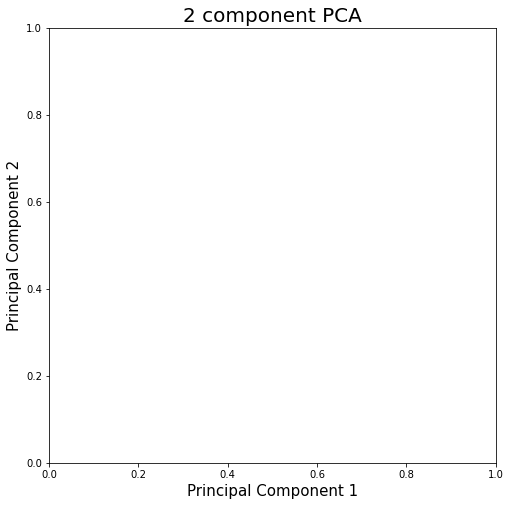

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_predicted == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = y_pred == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ХОЗЛ', 'БА', 'Пневмонія']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = x_train == target
    ax.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()